In [13]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [14]:
URL = "https://www.airlinequality.com/airline-reviews/british-airways/"
pages = 10
page_size = 100

In [15]:
reviews = []

for i in range(1, pages + 1):
    print(f"Scraping Page {i}")
    
    url = f"{URL}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    
    response = requests.get(url)
    
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
        
    print(f"   ---> {len(reviews)} total reviews")

Scraping Page 1
   ---> 100 total reviews
Scraping Page 2
   ---> 200 total reviews
Scraping Page 3
   ---> 300 total reviews
Scraping Page 4
   ---> 400 total reviews
Scraping Page 5
   ---> 500 total reviews
Scraping Page 6
   ---> 600 total reviews
Scraping Page 7
   ---> 700 total reviews
Scraping Page 8
   ---> 800 total reviews
Scraping Page 9
   ---> 900 total reviews
Scraping Page 10
   ---> 1000 total reviews


In [16]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head(10)

,reviews
0,Not Verified | BA business class in Europe h...
1,✅ Trip Verified | Our flight started in Seattl...
2,✅ Trip Verified | British Airways Flight fro...
3,✅ Trip Verified | British Airways World Trav...
4,✅ Trip Verified | BA is barely a step above ...
5,Not Verified | Happy with the flight crew. Ha...
6,✅ Trip Verified | Horrible service from boar...
7,Not Verified | My wife and I are very disappo...
8,Not Verified | We flew BA between Heathrow an...
9,Not Verified | Absolutely disgusted with BA. ...


In [17]:
df.to_csv("data/BritishAirwaysWebReport.csv")

PermissionError: [Errno 13] Permission denied: 'data/BritishAirwaysWebReport.csv'

In [22]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ------ -------------------------------- 51.2/300.2 kB 525.1 kB/s eta 0:00:01
   ------ -------------------------------- 51.2/300.2 kB 525.1 kB/s eta 0:00:01
   ------ -------------------------------- 51.2/300.2 kB 525.1 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/300.2 kB 326.8 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/300.2 kB 286.7 kB/s eta 0:00:01
   ---------- -----------------

In [23]:
import matplotlib.pyplot as plt

In [24]:
from wordcloud import WordCloud, STOPWORDS

In [34]:
df2 = pd.read_csv("data/BritishAirwaysWebReport.csv", encoding='windows-1252', delimiter=';')
df2.head(10)

,# Reviews,Reviews
0,0.0,BA business class in Europe has a seat the ...
1,1.0,Our flight started in Seattle Wa heading to L...
2,2.0,British Airways Flight from Edinburgh got d...
3,3.0,British Airways World Traveller Plus (Premi...
4,4.0,BA is barely a step above low cost airlines...
5,5.0,Happy with the flight crew. Hadn't been on a...
6,6.0,Horrible service from boarding to landing. ...
7,7.0,My wife and I are very disappointed with fly...
8,8.0,We flew BA between Heathrow and Berlin one w...
9,9.0,Absolutely disgusted with BA. Our flights we...


In [35]:
stopwords = STOPWORDS

In [39]:
df2['Reviews'] = df2['Reviews'].fillna('')  
df2['Reviews'] = df2['Reviews'].astype(str)  

wc = WordCloud(background_color='white', stopwords=stopwords).generate(' '.join(df2['Reviews']))


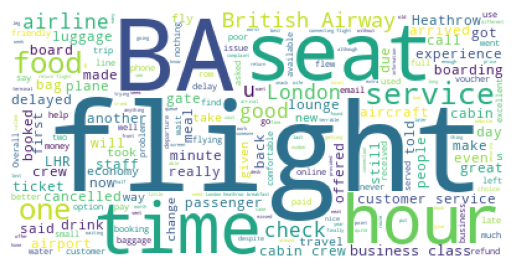

In [40]:
plt.imshow(wc)
plt.axis('off')
plt.show()

In [45]:
stopwords.add('BA')
stopwords.add('flight')
stopwords.add('British Airway')
stopwords.add('seat')
wc = WordCloud(background_color='white', stopwords=stopwords).generate(' '.join(df2['Reviews']))

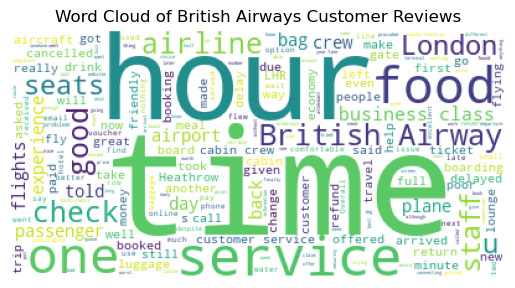

In [76]:
plt.imshow(wc)
plt.axis('off')
plt.title('Word Cloud of British Airways Customer Reviews')
plt.show()

In [47]:
!pip install vaderSentiment textblob

  Obtaining dependency information for vaderSentiment from https://files.pythonhosted.org/packages/76/fc/310e16254683c1ed35eeb97386986d6c00bc29df17ce280aed64d55537e9/vaderSentiment-3.3.2-py2.py3-none-any.whl.metadata
  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
   ------ -------------------------------- 20.5/126.0 kB 222.6 kB/s eta 0:00:01
   --------- ----------------------------- 30.7/126.0 kB 220.2 kB/s eta 0:00:01
   ------------ -------------------------- 41.0/126.0 kB 219.4 kB/s eta 0:00:01
   ------------ -------------------------- 41.0/126.0 kB 219.4 kB/s eta 0:00:01
   ------------ -------------------------- 41.0/126.0 kB 219.4 kB/s eta 0:00:01
   ------------ ----------------

In [57]:
df3 = pd.read_csv("data/BritishAirwaysWebReport.csv", encoding='windows-1252', delimiter=';')
df3.head(10)

,# Reviews,Reviews
0,0.0,BA business class in Europe has a seat the ...
1,1.0,Our flight started in Seattle Wa heading to L...
2,2.0,British Airways Flight from Edinburgh got d...
3,3.0,British Airways World Traveller Plus (Premi...
4,4.0,BA is barely a step above low cost airlines...
5,5.0,Happy with the flight crew. Hadn't been on a...
6,6.0,Horrible service from boarding to landing. ...
7,7.0,My wife and I are very disappointed with fly...
8,8.0,We flew BA between Heathrow and Berlin one w...
9,9.0,Absolutely disgusted with BA. Our flights we...


In [58]:
reviews = df3.iloc[:, 1]

In [62]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
df3.columns = ['ID', 'Reviews']

# VADER analiz aracı
analyzer = SentimentIntensityAnalyzer()

# Yorumlara sentiment analizi uygulayalım
def get_vader_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']  # Compound skor, genel duygu skorudur

# Yorumların sentiment skorlarını hesapla
df3['Vader_Sentiment'] = reviews.apply(lambda x: get_vader_sentiment(str(x)))

# Sonuçları incelemek için
df3[['Reviews', 'Vader_Sentiment']].head()


,Reviews,Vader_Sentiment
0,BA business class in Europe has a seat the ...,-0.3326
1,Our flight started in Seattle Wa heading to L...,0.6474
2,British Airways Flight from Edinburgh got d...,-0.7535
3,British Airways World Traveller Plus (Premi...,0.9747
4,BA is barely a step above low cost airlines...,-0.7650


In [63]:
def categorize_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df3['Sentiment_Category'] = df['Vader_Sentiment'].apply(categorize_sentiment)

# Sonuçları incelemek için
df3[['Reviews', 'Vader_Sentiment', 'Sentiment_Category']].head()


,Reviews,Vader_Sentiment,Sentiment_Category
0,BA business class in Europe has a seat the ...,-0.3326,Negative
1,Our flight started in Seattle Wa heading to L...,0.6474,Positive
2,British Airways Flight from Edinburgh got d...,-0.7535,Negative
3,British Airways World Traveller Plus (Premi...,0.9747,Positive
4,BA is barely a step above low cost airlines...,-0.7650,Negative


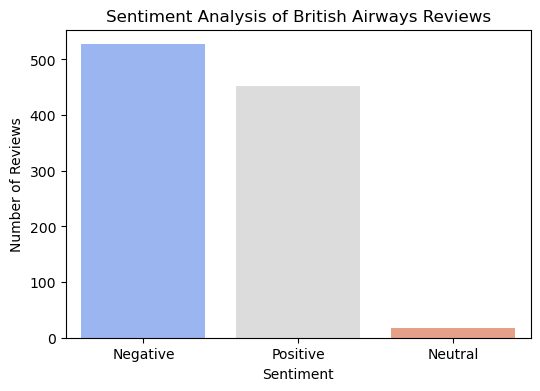

In [64]:
import seaborn as sns

# Sentiment kategorilerinin sayısal dağılımı
sentiment_counts = df3['Sentiment_Category'].value_counts()

# Bar grafiği çizelim
plt.figure(figsize=(6,4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')
plt.title('Sentiment Analysis of British Airways Reviews')
plt.ylabel('Number of Reviews')
plt.xlabel('Sentiment')
plt.show()

In [67]:
plt.savefig('sentiment_analysis.jpg')

<Figure size 640x480 with 0 Axes>

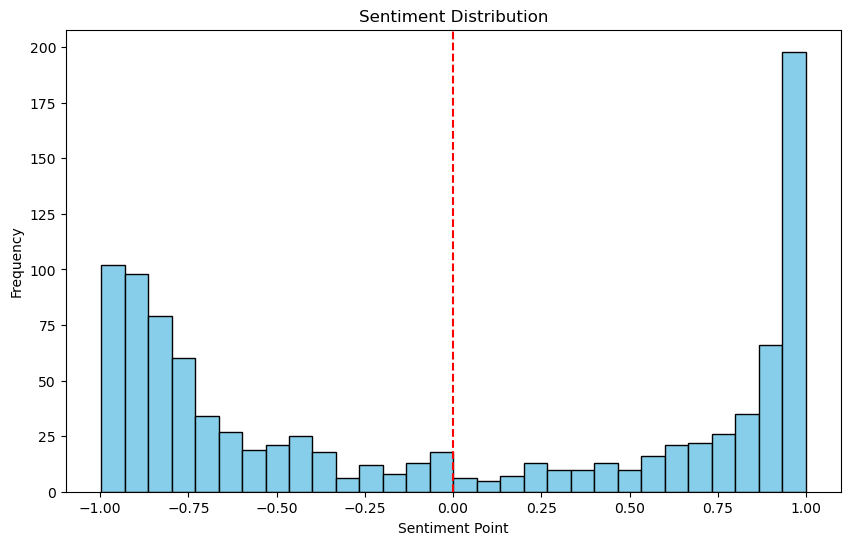

In [69]:
plt.figure(figsize=(10, 6))
plt.hist(df3['Vader_Sentiment'], bins=30, color='skyblue', edgecolor='black')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Point')
plt.ylabel('Frequency')
plt.axvline(x=0, color='red', linestyle='--')  
plt.show()

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   reviews          1000 non-null   object 
 1   Vader_Sentiment  998 non-null    float64
dtypes: float64(1), object(1)
memory usage: 15.8+ KB
